#  Diagrama de Pareto + Regra de Sturges
implementando conceitos diferentes que aprendi em aula

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# data
erros = ['Validação', 'Interface', 'Lógica', 'Banco de Dados', 'Desempenho']
np.random.seed(42)
dados = np.random.choice(erros, size=100, p=[0.35, 0.25, 0.2, 0.15, 0.05])

In [3]:
#frequência e acumulado
frequencia = pd.Series(dados).value_counts().sort_values(ascending=False)
df = pd.DataFrame({'Erro': frequencia.index, 'Frequência': frequencia.values})
df['% Acumulado'] = df['Frequência'].cumsum() / df['Frequência'].sum() * 100
df

,Erro,Frequência,% Acumulado
0,Validação,41,41.0
1,Interface,22,63.0
2,Lógica,19,82.0
3,Banco de Dados,13,95.0
4,Desempenho,5,100.0


In [4]:
#sturges
n = len(dados)
k = math.ceil(1 + math.log2(n))
print(f"Número sugerido de classes (Sturges): {k}")

Número sugerido de classes (Sturges): 8


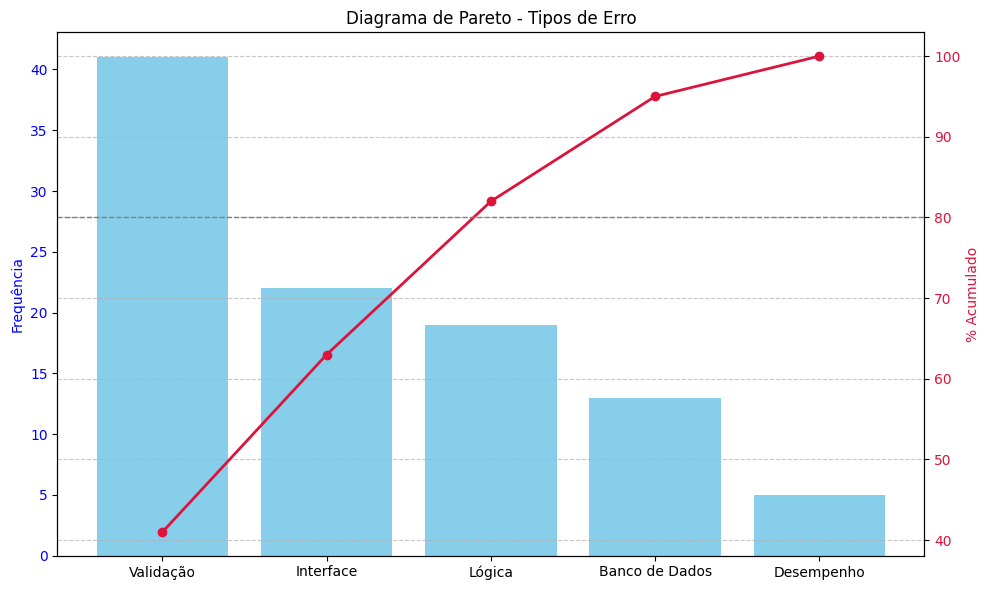

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(df['Erro'], df['Frequência'], color='skyblue')
ax1.set_ylabel('Frequência', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(df['Erro'], df['% Acumulado'], color='crimson', marker='o', linewidth=2)
ax2.set_ylabel('% Acumulado', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.axhline(80, color='gray', linestyle='dashed', linewidth=1)
plt.title('Diagrama de Pareto - Tipos de Erro')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()